## Data Mining Assignment 4
### Author G. Gordon
February 15, 2016

Part 3 - Product 11741274

## DATA ANALYSIS

In [1]:
dir()

[1] "Assignment 4-11740941-Copy2.ipynb"       
 [2] "Assignment 4-11740941.ipynb"             
 [3] "Assignment 4-11741274.ipynb"             
 [4] "Assignment 4-11741274-wip2.ipynb"        
 [5] "Assignment 4-11743201.ipynb"             
 [6] "Assignment 4-11743201-wip2.ipynb"        
 [7] "Assignment 4.ipynb"                      
 [8] "last_n_days_time_series.py"              
 [9] "product-11740941-7-day-forecast-data.csv"
[10] "product-11740941-daily-quantities.csv"   
[11] "product-11740941.zip"                    
[12] "product-11741274-7-day-forecast-data.csv"
[13] "product-11741274-daily-quantities.csv"   
[14] "product-11741274.zip"                    
[15] "product-11743201-7-day-forecast-data.csv"
[16] "product-11743201-daily-quantities.csv"   
[17] "product-11743201.zip"                    
[18] "timeseriesHistory.r"                     
[19] "top product queries"

In [2]:
# Import the data for prod 11740941
prod1.data = read.csv('product-11741274-7-day-forecast-data.csv',header=F)
head(prod1.data)

V1  V2  V3  V4  V5  V6  V7  V8
1 654 631 430 372 583 331 285 323
2 631 430 372 583 331 285 323 441
3 430 372 583 331 285 323 441 407
4 372 583 331 285 323 441 407 331
5 583 331 285 323 441 407 331 386
6 331 285 323 441 407 331 386 333

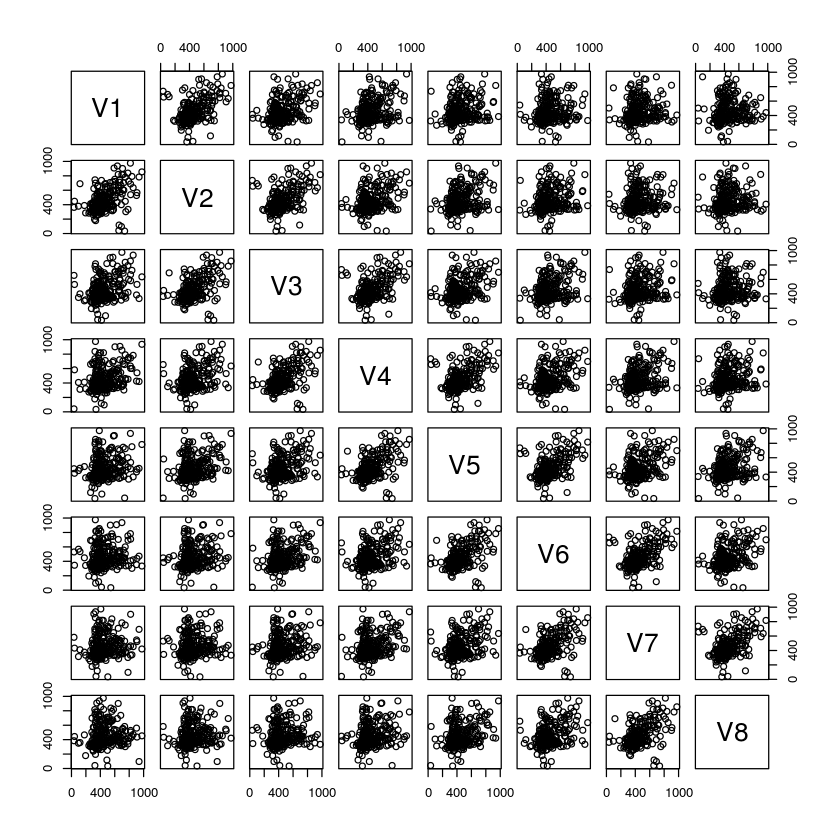

In [3]:
plot(prod1.data)

In [4]:
prod1.days = 1:nrow(prod1.data)

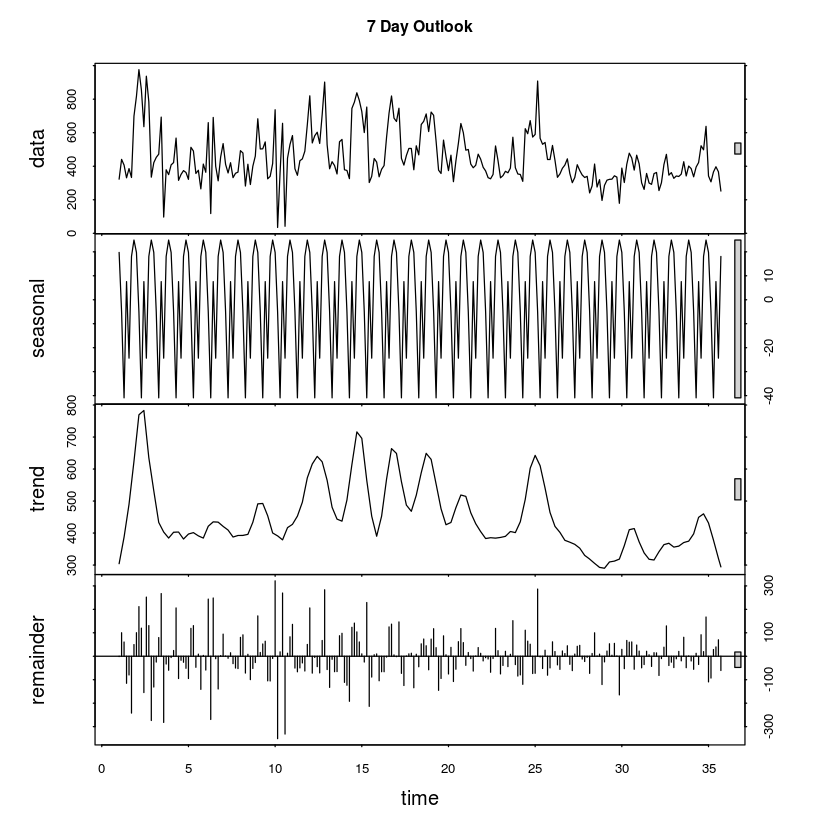

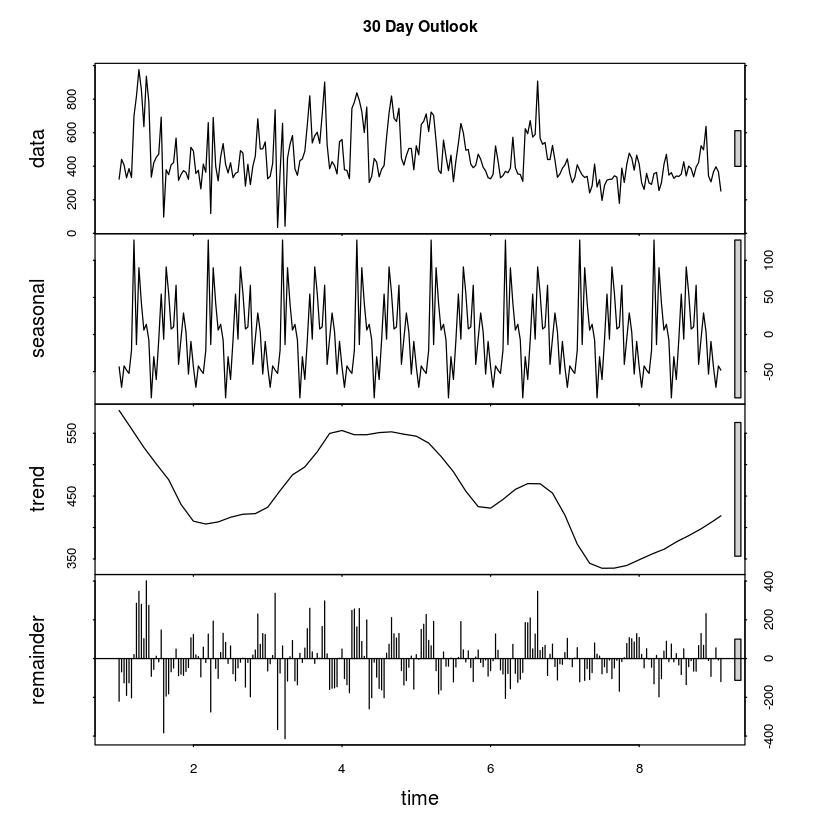

In [5]:
prod1.ts7 = ts(prod1.data,start = 1,freq=7)
prod1.ts30 = ts(prod1.data,start = 1,freq=30)
plot(stl(prod1.ts7[,8],s.window='periodic'),main="7 Day Outlook")
plot(stl(prod1.ts30[,8],s.window='periodic'),main="30 Day Outlook")
plot(stl(log(prod1.ts7[,8]),s.window='periodic'),main="Log 7 Day Outlook")
plot(stl(log(prod1.ts30[,8]),s.window='periodic'),main="Log 30 Day Outlook")

In [6]:
# Split data into 80/20 Train/Test
set.seed(23)
no_of_observations = nrow(prod1.data)
percent_split = 0.8
sampler = sample(1:no_of_observations,size = as.integer(percent_split * no_of_observations))
#Normalize Columns Using Max
prod1.data.normalized = prod1.data
for(i in 1:ncol(prod1.data)){
    prod1.data.normalized[,i] = prod1.data[,i] /max(prod1.data[,i]) 
}

prod1.data.train = prod1.data.normalized[sampler,]

prod1.data.test = prod1.data.normalized[-sampler,]

paste("Train Size: ",nrow(prod1.data.train),"| Test size: ", nrow(prod1.data.test)," | Total:",no_of_observations)


[1] "Train Size:  195 | Test size:  49  | Total: 244"

### Regression Model


Call:
lm(formula = V8 ~ ., data = prod1.data.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.54373 -0.06393 -0.01406  0.05853  0.37693 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.131850   0.046607   2.829  0.00518 ** 
V1           0.044100   0.069895   0.631  0.52885    
V2           0.007119   0.073050   0.097  0.92247    
V3          -0.013466   0.078468  -0.172  0.86393    
V4          -0.034778   0.080680  -0.431  0.66692    
V5           0.149115   0.076513   1.949  0.05281 .  
V6           0.079081   0.078170   1.012  0.31301    
V7           0.469841   0.073819   6.365 1.47e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1355 on 187 degrees of freedom
Multiple R-squared:  0.3222,	Adjusted R-squared:  0.2968 
F-statistic:  12.7 on 7 and 187 DF,  p-value: 2.689e-13


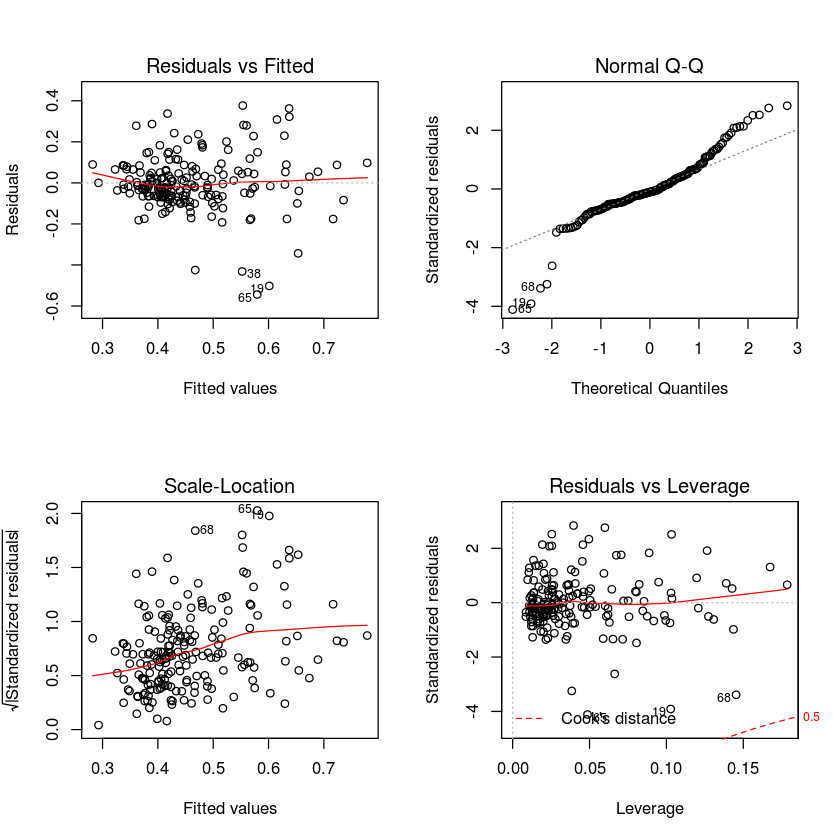

In [7]:
prod1.lm.fit = lm(V8 ~ .,data = prod1.data.train)
summary(prod1.lm.fit)
par(mfrow=c(2,2))
plot(prod1.lm.fit)

In [8]:
# Predict on test data set using regression model
prod1.lm.pred = predict(prod1.lm.fit,prod1.data.test[,1:7])
# Determine the mean absolute percentage error
prod1.lm.error=mean(100*abs(prod1.data.test[,8] - prod1.lm.pred)/ prod1.data.test[,8])
paste('Mean Absolute % Error for Regression Model : ',prod1.lm.error,'%')

[1] "Mean Absolute % Error for Regression Model :  24.0456303269329 %"

### SVM Model

In [9]:
library(e1071) # Load svm from library

In [10]:
#Build SVM Model
prod1.svm.fit = svm(prod1.data.train[,1:7],prod1.data.train[,8])
plot(prod1.svm.fit,prod1.data.train[,1:7],"V1 ~ V2")
# Predict using test data
prod1.svm.pred = predict(prod1.svm.fit,prod1.data.test[,1:7])
# Determine the mean absolute percentage error
prod1.svm.error=mean(100*abs(prod1.data.test[,8] - prod1.svm.pred)/prod1.data.test[,8])
paste('Mean Absolute % Error for SVM : ',prod1.svm.error,'%')

[1] "Mean Absolute % Error for SVM :  20.1429864360942 %"

### Neural Network

In [11]:
# Load Libraries
library(neuralnet) 
library(RSNNS)
library('devtools')
source_url('https://gist.githubusercontent.com/gggordon/809278dab6d7c6692f8b/raw/36cd22fa4dd7c719cecc6d30e006cdc07e2c0109/plot.nnet.r')

Loading required package: grid
Loading required package: MASS
Loading required package: Rcpp
SHA-1 hash of file is 74c80bd5ddbc17ab3ae5ece9c0ed9beb612e87ef


In [12]:
prod1.nn.1.fit = neuralnet(V8~V1+V2+V3+V4+V5+V6+V7,
                           data=prod1.data.train,
                           hidden=1,
                           learningrate=0.01,
                           #threshold=0.001,
                           #lifesign="full",
                           algorithm="backprop")
prod1.nn.1.pred = compute(prod1.nn.1.fit,prod1.data.test[,1:7])$net.result
prod1.nn.1.error=mean(100*abs(prod1.data.test[,8] - prod1.nn.1.pred)/prod1.data.test[,8])
paste('Mean Absolute % Error for Neural Network (1 hidden) : ',prod1.nn.1.error,'%')
#set.seed(23)
#plot.nnet(prod1.nn.4.fit,"Neural Network (4 Hidden)")

[1] "Mean Absolute % Error for Neural Network (1 hidden) :  25.8549617524538 %"

In [33]:
prod1.nn.10.fit = neuralnet(V8~V1+V2+V3+V4+V5+V6+V7,
                           data=prod1.data.train,
                           hidden=8,
                           learningrate=0.01,
                           #threshold=0.001,
                           #lifesign="full",
                           algorithm="backprop")
prod1.nn.10.pred = compute(prod1.nn.10.fit,prod1.data.test[,1:7])$net.result
prod1.nn.10.error=mean(100*abs(prod1.data.test[,8] - prod1.nn.10.pred)/prod1.data.test[,8])
paste('Mean Absolute % Error for Neural Network (8 hidden) : ',prod1.nn.10.error,'%')

[1] "Mean Absolute % Error for Neural Network (8 hidden) :  25.8898773588716 %"

### Time Series Evaluation

#### More Data Preparation

In [14]:
# Retrieve the original time series data but concatenating the first row values with the last column values
prod1.data.raw=c(as.vector(t(prod1.data[1,1:7])[,1]),prod1.data[,8])

Time Series:
Start = c(1, 1) 
End = c(36, 6) 
Frequency = 7 
  [1] 654 631 430 372 583 331 285 323 441 407 331 386 333 699 817 976 855 636
 [19] 937 784 335 421 453 472 693  97 379 350 408 422 568 316 351 374 363 322
 [37] 513 491 357 376 265 413 364 660 118 691 400 313 455 535 411 360 421 332
 [55] 358 365 493 479 282 412 291 400 461 683 503 504 545 325 340 416 737  35
 [73] 363 656  42 448 530 583 385 346 433 444 490 648 820 539 582 603 536 708
 [91] 902 528 385 427 404 354 546 560 379 375 326 745 782 838 792 726 601 753
[109] 303 340 446 425 337 382 404 573 717 819 687 667 746 447 407 464 506 506
[127] 379 522 468 649 668 712 607 723 704 549 377 357 556 457 374 466 308 432
[145] 537 655 600 496 500 413 391 406 472 442 394 372 332 325 351 521 434 331
[163] 344 370 361 389 573 391 354 351 310 624 594 672 574 590 908 567 531 542
[181] 440 440 524 436 334 354 388 407 444 357 302 333 409 375 348 333 340 241
[199] 283 413 276 320 196 286 317 322 323 343 335 179 389 303 412 478 449 377
[21

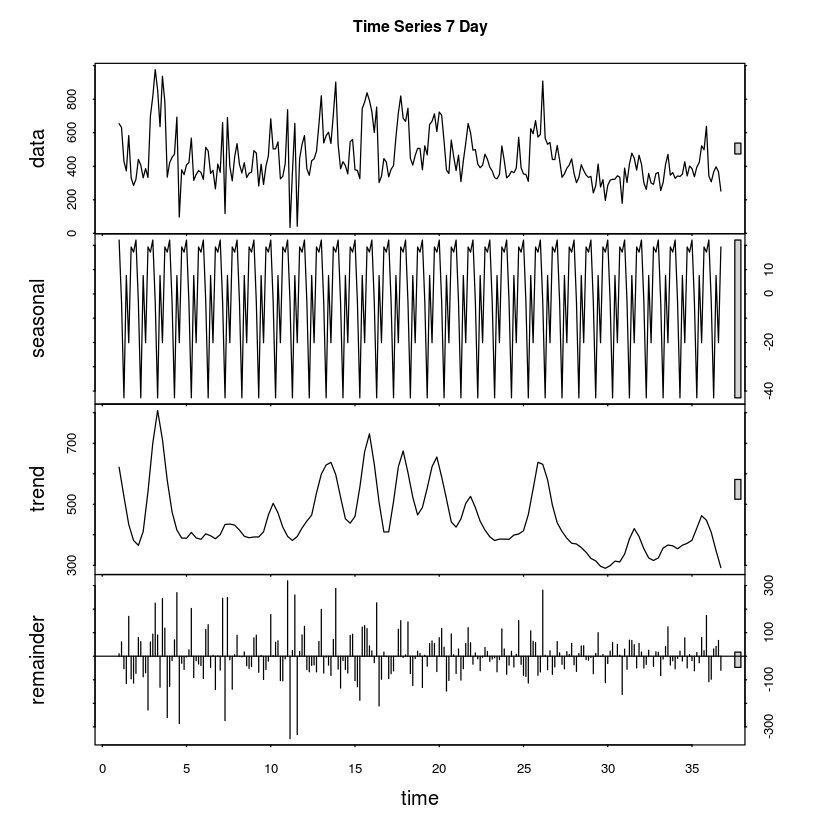

Time Series:
Start = c(1, 1) 
End = c(36, 6) 
Frequency = 7 
  [1] 6.483107351 6.447305863 6.063785209 5.918893854 6.368187186 5.802118375
  [7] 5.652489180 5.777652323 6.089044875 6.008813185 5.802118375 5.955837369
 [13] 5.808142490 6.549650742 6.705639095 6.883462586 6.751101469 6.455198563
 [19] 6.842683282 6.664409020 5.814130532 6.042632834 6.115892125 6.156978986
 [25] 6.541029999 4.574710979 5.937536205 5.857933154 6.011267174 6.045005314
 [31] 6.342121419 5.755742214 5.860786223 5.924255797 5.894402834 5.774551546
 [37] 6.240275845 6.196444128 5.877735782 5.929589143 5.579729826 6.023447593
 [43] 5.897153868 6.492239835 4.770684624 6.538139824 5.991464547 5.746203191
 [49] 6.120297419 6.282266747 6.018593214 5.886104031 6.042632834 5.805134969
 [55] 5.880532986 5.899897354 6.200509174 6.171700597 5.641907071 6.021023349
 [61] 5.673323267 5.991464547 6.133398043 6.526494860 6.220590170 6.222576268
 [67] 6.300785795 5.783825182 5.828945618 6.030685260 6.602587892 3.555348061
 [7

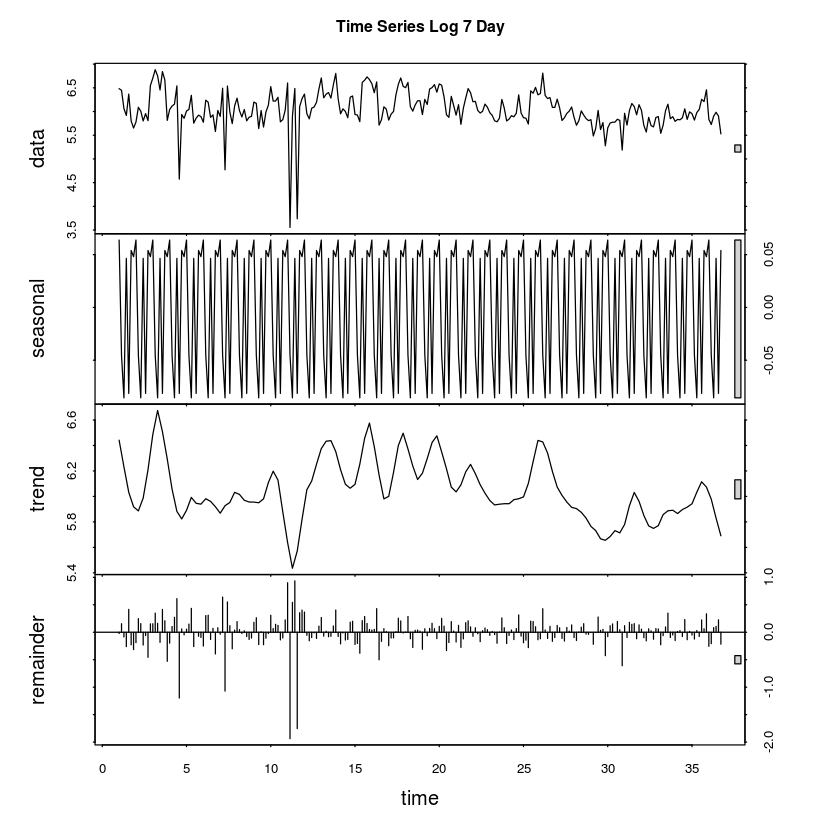

In [15]:
# Create time series from start of year for 7 day periods
prod1.data.rawts=ts(prod1.data.raw,start=1,freq=7)

plot(stl(prod1.data.rawts,s.window="periodic"),main="Time Series 7 Day")
prod1.data.rawts

prod1.data.rawts.log=log(prod1.data.rawts)
plot(stl(prod1.data.rawts.log,s.window="periodic"),main="Time Series Log 7 Day")
prod1.data.rawts.log



In [16]:
# Split time series data in test data (last 2 weeks/last 14 days) and train data to evaluate models
prod1.data.rawts.size = length(prod1.data.rawts)
prod1.data.rawts.trainBoundIndex = prod1.data.rawts.size-14
paste("Training Bound Index : ",prod1.data.rawts.trainBoundIndex)
prod1.data.rawts.train = ts(prod1.data.rawts[1:prod1.data.rawts.trainBoundIndex],start=1,freq=7)
                            
prod1.data.rawts.test = ts(prod1.data.rawts[(prod1.data.rawts.trainBoundIndex+1):prod1.data.rawts.size],
                           start=prod1.data.rawts.trainBoundIndex+1,freq=7)

paste("Train Size: ",length(prod1.data.rawts.train),
      "| Test size: ", length(prod1.data.rawts.test),
      " | Total:",prod1.data.rawts.size)


[1] "Training Bound Index :  237"

[1] "Train Size:  237 | Test size:  14  | Total: 251"

### Holt Winters

In [36]:
prod1.hw=HoltWinters(prod1.data.rawts.train)
prod1.hw

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = prod1.data.rawts.train)

Smoothing parameters:
 alpha: 0.4511556792
 beta : 0.005567509725
 gamma: 0.4057182769

Coefficients:
            [,1]
a  281.256976413
b   -3.290797028
s1  71.825591603
s2  84.834814472
s3  49.179524889
s4  58.981298456
s5 114.249999112
s6 117.202617674
s7  60.966179991

In [37]:
prod1.hw.rms=sqrt(sum((prod1.data.rawts.train-prod1.hw$fit[,1])^2)/length(prod1.data.rawts.train))
paste('Root Mean Square Error: ',prod1.hw.rms)

[1] "Root Mean Square Error:  142.897872959523"

In [38]:
plot(prod1.data.rawts,col="blue",
     main="Holt Winters 14 Day Prediction(Purple) vs Actual 14 Day(blue)",
     ylab="Item Purchases")
prod1.hw.pred = predict(prod1.hw,n.ahead=14)
lines(prod1.hw.pred,col=c('purple'))
testv = as.vector(prod1.data.rawts.test)
predv = as.vector(prod1.hw.pred[,1])
prod1.hw.error=mean(100*abs(testv - predv)/testv)
paste('Mean Absolute % Error for Holt Winters : ',prod1.hw.error,'%')

[1] "Mean Absolute % Error for Holt Winters :  15.4700729958441 %"

### Arima

In [20]:
library(forecast)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate

Attaching package: ‘timeDate’

The following objects are masked from ‘package:e1071’:

    kurtosis, skewness

This is forecast 6.2 



In [42]:
# Use AIC as model evaluation test to test ARIMA models and choose best
# Initally Assumed (7,0,0)
prod1.arima.fit=auto.arima(prod1.data.rawts.train, ic = "aic")
prod1.arima.fit

Warning message:
In auto.arima(prod1.data.rawts.train, ic = "aic"): Unable to fit final model using maximum likelihood. AIC value approximated

Series: prod1.data.rawts.train 
ARIMA(3,1,1)(2,0,1)[7]                    

Coefficients:
            ar1        ar2        ar3         ma1        sar1       sar2
      0.2319201  0.1488097  0.1612399  -0.9816633  -0.0596831  0.2681173
s.e.  0.0621192  0.0616136  0.0638831   0.0284168   0.1448612  0.0681825
           sma1
      0.1323714
s.e.  0.1592610

sigma^2 estimated as 16152.67:  log likelihood=-1478.27
AIC=2962.7   AICc=2963.34   BIC=2990.41

Time Series:
Start = c(34, 7) 
End = c(36, 6) 
Frequency = 7 
 [1] 398.6869192 420.0588706 421.3133135 430.2091580 442.6497733 444.0258006
 [7] 446.5398527 450.2016435 451.6085217 452.4129602 453.6395818 454.3470391
[13] 454.7156701 455.1257288

[1] "Mean Absolute % Error for Holt Winters :  23.2317272980919 %"

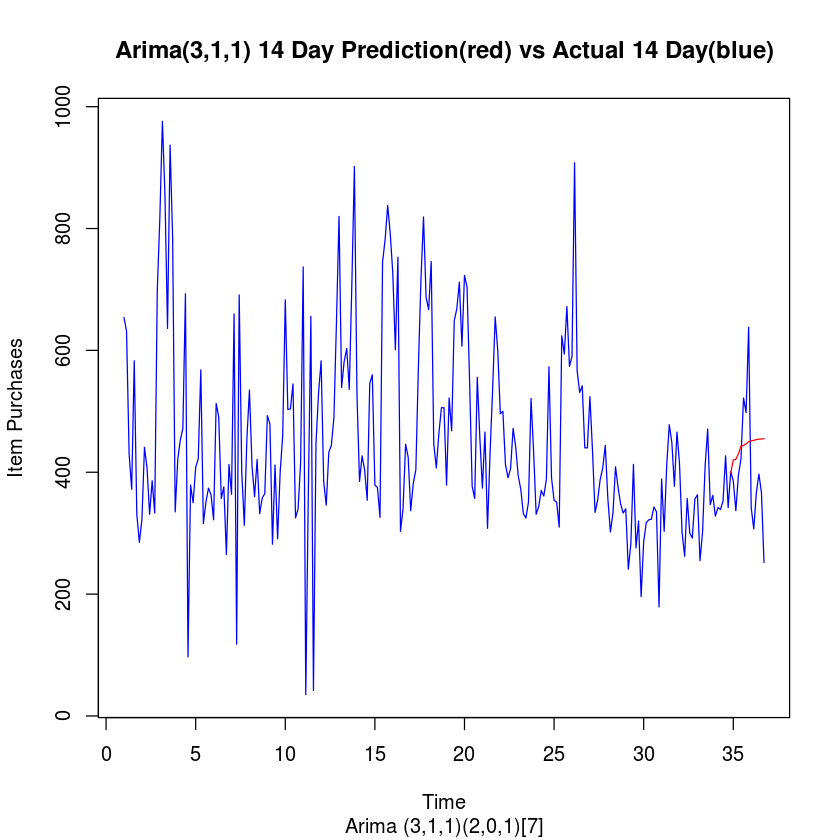

In [40]:
plot(prod1.data.rawts,col="blue",
     main="Arima(3,1,1) 14 Day Prediction(red) vs Actual 14 Day(blue)",
     sub="Arima (3,1,1)(2,0,1)[7]",
     ylab="Item Purchases")
prod1.arima.pred= predict(prod1.arima,n.ahead=14)$pred
prod1.arima.pred
lines(prod1.arima.pred,col=c('red'))
testv = as.vector(prod1.data.rawts.test)

predv = as.vector(prod1.arima.pred)
prod1.arima.error=mean(100*abs(testv - predv)/testv)
paste('Mean Absolute % Error for Holt Winters : ',prod1.arima.error,'%')

In [41]:
prod1.arima=arima(prod1.data.rawts.train,order=c(7,0,0))
prod1.arima


plot(prod1.data.rawts,col="blue",
     main="Arima(7,0,0) 14 Day Prediction(red) vs Actual 14 Day(blue)",
     ylab="Item Purchases")
prod1.arima.pred= predict(prod1.arima,n.ahead=14)$pred
prod1.arima.pred
lines(prod1.arima.pred,col=c('red'))
testv = as.vector(prod1.data.rawts.test)

predv = as.vector(prod1.arima.pred)
prod1.arima.error=mean(100*abs(testv - predv)/testv)
paste('Mean Absolute % Error for Holt Winters : ',prod1.arima.error,'%')


Call:
arima(x = prod1.data.rawts.train, order = c(7, 0, 0))

Coefficients:
            ar1        ar2        ar3         ar4         ar5        ar6
      0.3867489  0.1328721  0.1464823  -0.0177098  -0.0605749  0.0193713
s.e.  0.0649417  0.0697124  0.0700200   0.0707039   0.0703302  0.0697839
            ar7    intercept
      0.0088882  456.1424784
s.e.  0.0651165   22.6217110

sigma^2 estimated as 18223.09:  log likelihood = -1499.03,  aic = 3016.06

Time Series:
Start = c(34, 7) 
End = c(36, 6) 
Frequency = 7 
 [1] 398.6869192 420.0588706 421.3133135 430.2091580 442.6497733 444.0258006
 [7] 446.5398527 450.2016435 451.6085217 452.4129602 453.6395818 454.3470391
[13] 454.7156701 455.1257288

[1] "Mean Absolute % Error for Holt Winters :  23.2317272980919 %"